In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
sns.set()

import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr
# карта крупных рек, образующих пойму
H0 = ReadFile("H0.grd")
# карта русел
rusla = ReadFile("eriki.grd")
# карта дорог
Road = ReadFile("road_all_2022.grd")
# рельеф
relief_base = ReadFile("relief_base.grd")

VAP = ReadFile("VAP_35.grd")
print(R[340][440:450])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
6 русло 20 476:510   399:429
375:408
535:569   

6 русло 30 486:520 403:435
6 русло 45 511:544 402:432
6 русло 60 525:558 416:449
6 русло 120 525:557 499:528
6 русло 150 495:528 527:558

In [2]:
import os
content_ugol = os.listdir('Data/ugol/')
#print(content_ugol)
for i in content_ugol:
    print(i)

расчет 2016 relief_model_без_дамб_q_18_угол_120
расчет 2016 relief_model_без_дамб_q_18_угол_150
расчет 2016 relief_model_без_дамб_q_18_угол_160
расчет 2016 relief_model_без_дамб_q_18_угол_20
расчет 2016 relief_model_без_дамб_q_18_угол_30
расчет 2016 relief_model_без_дамб_q_18_угол_45
расчет 2016 relief_model_без_дамб_q_18_угол_60


In [3]:
list1 = [
'расчет 2016 relief_model_без_дамб_q_18_угол_20',
'расчет 2016 relief_model_без_дамб_q_18_угол_30',
'расчет 2016 relief_model_без_дамб_q_18_угол_45',
'расчет 2016 relief_model_без_дамб_q_18_угол_60',
'расчет 2016 relief_model_без_дамб_q_18_угол_120',
'расчет 2016 relief_model_без_дамб_q_18_угол_150'
]

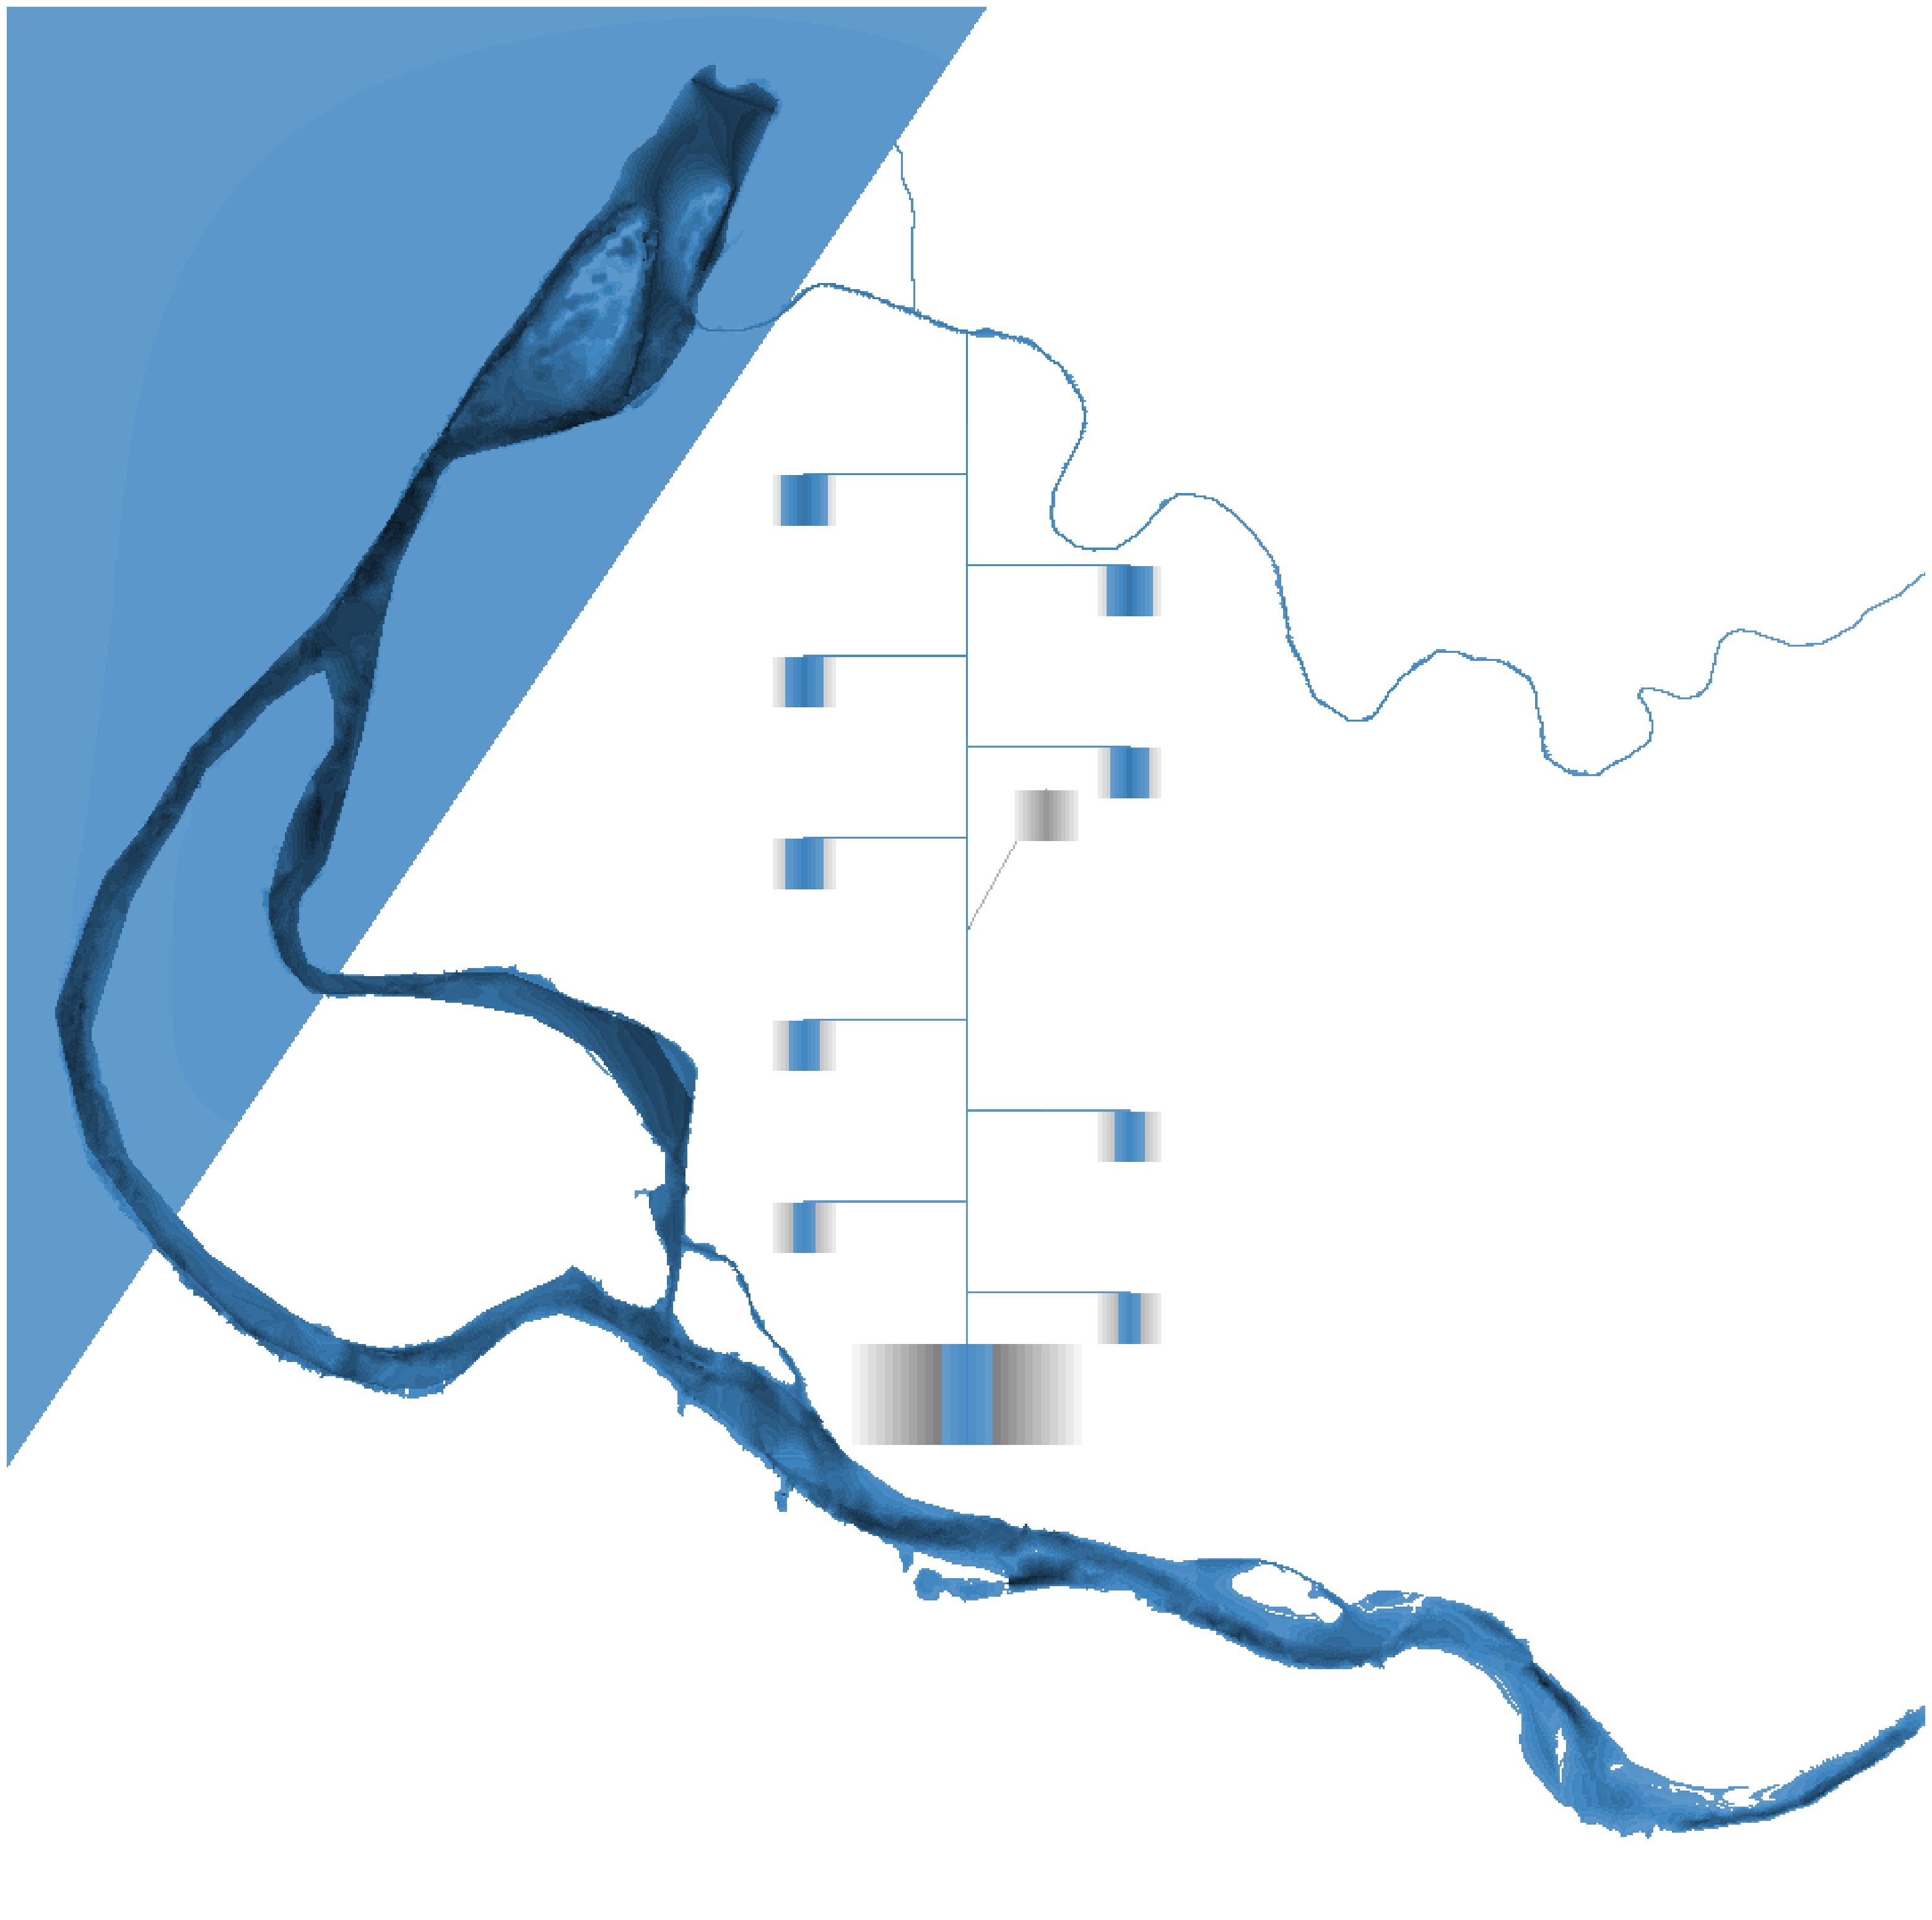

In [6]:
blue = ['#619bcc', '#5b97ca', '#5593c8', '#4f8fc6', '#488bc4', '#4288c2',
'#3d84bf','#397bb3','#3777ac', '#3573a6','#336ea0','#316a9a', '#2f6694','#2d618e','#2b5d87',
'#295981','#27557b','#255075','#234c6f', '#214868','#1f4462','#1d3f5c','#1b3b56','#193750',
'#17334a','#152e43','#132a3d', '#112637', '#0f2231', '#0d1d2b', '#0b1925', '#09151e']
relief1 = ReadFile("Data/ugol/" + list1[-1] + "/relief.grd")
H1 = ReadFile("Data/ugol/" + list1[-1] + "/H_   14.grd")
def plot_relief(rel):
    fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap

    binary_cmap = plt.cm.get_cmap('binary')
    new_binary_colors = list(binary_cmap(np.linspace(0, 1, binary_cmap.N))[::-1])
    new_binary_cmap = ListedColormap(new_binary_colors, name='new_binary')
    a = ax.pcolormesh(rel, cmap=new_binary_cmap)
    ax.pcolormesh(np.where(H1!=0, H1, np.nan), cmap=mcolors.ListedColormap(blue))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
    fig.set_figwidth(40)    
    fig.set_figheight(40)
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_relief(relief1)

In [4]:
def load_map(j, d, path, list1):
    H = np.zeros((d, 944, 944))
    vx = np.zeros((d, 944, 944))
    vy = np.zeros((d, 944, 944))
    k = 0
    for i in list1:
        H[k]=ReadFile("Data/" + path + i + "/" + 'H_   ' + j[k] + '.grd')
        vx[k]=ReadFile("Data/" + path + i + "/" + 'vx_   ' + j[k] + '.grd')
        vy[k]=ReadFile("Data/" + path + i + "/" + 'vy_   ' + j[k] + '.grd')
        k += 1
    return H, vx, vy

def water_cost(H, vx, vy, d):
    Rashod = np.zeros((d, 944, 944))
    for i in range(d):
        Rashod[i] = 50 * H[i] * np.sqrt(vx[i]*vx[i] +vy[i]*vy[i])
    return Rashod

In [ ]:
3 7 10 14

In [5]:
H25, vx25, vy25 = load_map((' 3', ' 3',  ' 3', ' 3', ' 3', ' 3'), 6, 'ugol/', list1)
H50, vx50, vy50 = load_map((' 7', ' 7',  ' 7', ' 7', ' 7', ' 7'), 6, 'ugol/', list1)
H75, vx75, vy75 = load_map(('10', '10',  '10', '10', '10', '10'), 6, 'ugol/', list1)
H100, vx100, vy100 = load_map(('14', '14',  '14', '14', '14','14'), 6, 'ugol/', list1)

In [6]:
Rashod25 = water_cost(H25, vx25, vy25, 6)
Rashod50 = water_cost(H50, vx50, vy50, 6)
Rashod75 = water_cost(H75, vx75, vy75, 6)
Rashod100 = water_cost(H100, vx100, vy100, 6)

In [ ]:
6 русло 20 476:510   399:429
375:409
535:569   

6 русло 30 486:520 403:435
6 русло 45 511:544 402:432
6 русло 60 525:558 416:449
6 русло 120 525:557 499:528
6 русло 150 495:528 527:558

In [15]:
for i in [
 (399, 429, 476, 510),
 (403, 435, 486, 520),
 (402, 432, 511, 544),
 (416, 449, 525, 558),
 (499, 528, 525, 557),
 (527, 558, 495, 528)
 ]:
    print(i)

(399, 429, 476, 510)
(403, 435, 486, 520)
(402, 432, 511, 544)
(416, 449, 525, 558)
(499, 528, 525, 557)
(527, 558, 495, 528)


In [7]:
coordinate = [
 (399, 429, 476, 510),
 (403, 435, 486, 520),
 (402, 432, 511, 544),
 (416, 449, 525, 558),
 (499, 528, 525, 557),
 (527, 558, 495, 528)
 ]

In [36]:
coordinate

[(399, 429, 476, 510),
 (403, 435, 486, 520),
 (402, 432, 511, 544),
 (416, 449, 525, 558),
 (499, 528, 525, 557),
 (527, 558, 495, 528)]

In [38]:
print_cost(Rashod75, 0, coordinate[0])

Русло 1  48.246838557748305
Русло 3  50.62967726491097
Русло 5  43.73937985422014
Русло 7  43.5276286637877
Русло 9  31.112907265201876
Русло 2  48.01775275772343
Русло 4  55.52152885879146
Русло 6  0.0
Русло 8  41.3895203222521
Русло 10  109.5116526362151


In [8]:
def print_cost(Rashod, k, R):    
    print('Русло 1 ', Rashod[k][670:729, 375:409].sum())
    print('Русло 3 ', Rashod[k][572:670, 375:409].sum())
    print('Русло 5 ', Rashod[k][494:539, 375:409].sum())
    print('Русло 7 ', Rashod[k][400:494, 375:409].sum())
    print('Русло 9 ', Rashod[k][312:400, 375:409].sum())
    
    print('Русло 2 ', Rashod[k][631:671, 535:569].sum())
    print('Русло 4 ', Rashod[k][530:631, 535:569].sum())
    print('Русло 6 ', Rashod[k][R[0]:R[1], R[2]:R[3]].sum())
    print('Русло 8 ', Rashod[k][355:440, 535:569].sum())
    print('Русло 10 ', Rashod[k][283:355, 535:569].sum())

def cost_sum(Rashod, k, i, R):
    a1 = Rashod[k][670:729, 367:405].sum()
    a2 = Rashod[k][631:671, 530:565].sum()
    a3 = Rashod[k][572:670, 367:405].sum()
    a4 = Rashod[k][530:631, 530:565].sum()
    a5 = Rashod[k][494:539, 367:405].sum()
    a6 = Rashod[k][R[0]:R[1], R[2]:R[3]].sum()
    a7 = Rashod[k][400:494, 367:405].sum()
    a8 = Rashod[k][355:440, 530:565].sum()
    a9 = Rashod[k][312:400, 367:405].sum()
    a10 = Rashod[k][283:355, 530:565].sum()
    if i == 0:
        return a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10
    if i == 1:
        return a1
    if i == 2:
        return a2
    if i == 3:
        return a3
    if i == 4:
        return a4
    if i == 5:
        return a5
    if i == 6:
        return a6
    if i == 7:
        return a7
    if i == 8:
        return a8
    if i == 9:
        return a9
    if i == 10:
        return a10

In [21]:
for i, j in enumerate(coordinate):
    print(i)
    print(j[0])

0
399
1
403
2
402
3
416
4
499
5
527


In [25]:
list1

['расчет 2016 relief_model_без_дамб_q_18_угол_20',
 'расчет 2016 relief_model_без_дамб_q_18_угол_30',
 'расчет 2016 relief_model_без_дамб_q_18_угол_45',
 'расчет 2016 relief_model_без_дамб_q_18_угол_60',
 'расчет 2016 relief_model_без_дамб_q_18_угол_120',
 'расчет 2016 relief_model_без_дамб_q_18_угол_150']

In [19]:
def cost_plot(Rashod, j, a, b):
    plt.plot([20, 30, 45, 60, 120, 150], [cost_sum(Rashod, k, j, l) for k, l in enumerate(coordinate)], label=b)
    plt.scatter([20, 30, 45, 60, 120, 150], [cost_sum(Rashod, k, j, l) for k, l in enumerate(coordinate)])

    plt.title(a)
    plt.xlabel("Угол наклона русла 6")
    plt.ylabel(r"$Расходы\;в\;русле\;(м^{3}/c)$")
    plt.legend()

In [22]:
def cost_plot2(Rashod, j, a, b):
    plt.plot([20, 30, 45, 60, 120, 150], [cost_sum(Rashod, k, j, l) for k, l in enumerate(coordinate)], label=b)
    plt.scatter([20, 30, 45, 60, 120, 150], [cost_sum(Rashod, k, j, l) for k, l in enumerate(coordinate)])

    plt.title(a)
    plt.xlabel("Угол наклона русла 6")
    plt.ylabel(r"$Расходы\;в\;русле\;(м^{3}/c)$")
    plt.legend()

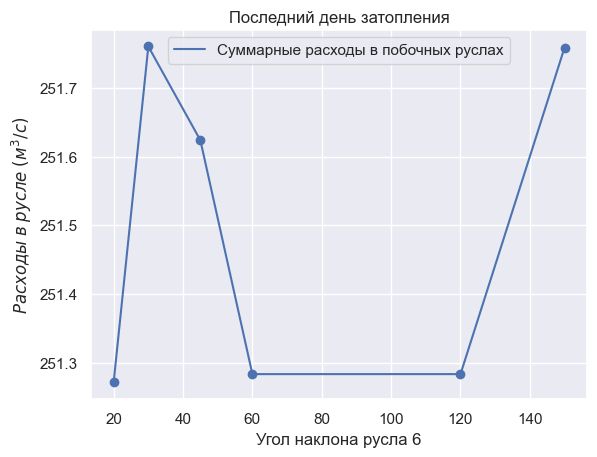

In [23]:
d = 0
cost_plot2(Rashod100, d, 'Последний день затопления', 'Суммарные расходы в побочных руслах')

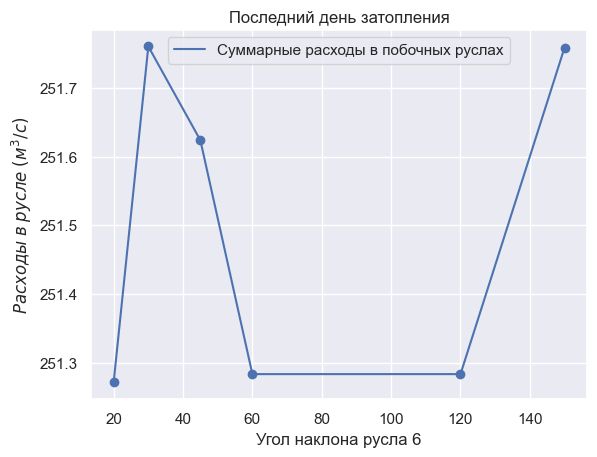

In [45]:
d = 0
cost_plot(Rashod100, d, 'Последний день затопления', 'Суммарные расходы в побочных руслах')

In [ ]:

def cost_sum(Rashod, k, i, R):
    a1 = Rashod[k][670:729, 367:405].sum()
    a2 = Rashod[k][631:671, 530:565].sum()

In [51]:
def cost_plot1(Rashod, j, a, b):
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [cost_sum(Rashod, k, d, l) for k, l, d in zip([j for p in range(0, 10)],[coordinate[j] for m in range(0, 10)], range(1, 11))], label=b)
    #plt.scatter([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [cost_sum(Rashod, k, d, l) for k, l, d in zip([j for p in range(0, 10)], [coordinate[j] for m in range(0, 10)], range(1, 11))])

    plt.title(a)
    plt.xlabel("Угол наклона русла 6")
    plt.ylabel(r"$Расходы\;в\;русле\;(м^{3}/c)$")
    plt.legend()

In [49]:
cost_sum(Rashod25, 0, 8, coordinate[0])

24.437310172283446

In [50]:
cost_sum(Rashod25, 1, 8, coordinate[1])

23.966283486350477

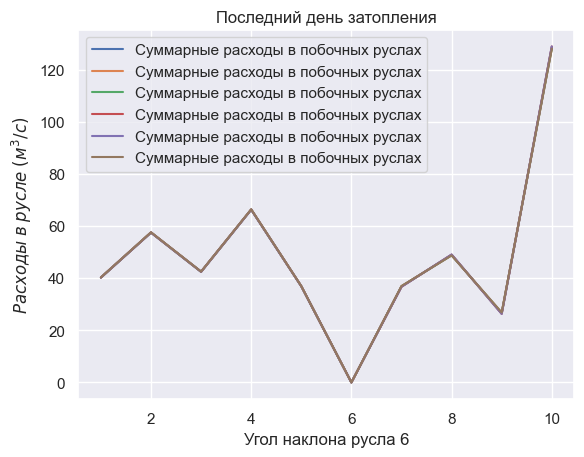

In [52]:
d = 0
cost_plot1(Rashod75, 0, 'Последний день затопления', 'Суммарные расходы в побочных руслах')
cost_plot1(Rashod75, 1, 'Последний день затопления', 'Суммарные расходы в побочных руслах')
cost_plot1(Rashod75, 2, 'Последний день затопления', 'Суммарные расходы в побочных руслах')
cost_plot1(Rashod75, 3, 'Последний день затопления', 'Суммарные расходы в побочных руслах')
cost_plot1(Rashod75, 4, 'Последний день затопления', 'Суммарные расходы в побочных руслах')
cost_plot1(Rashod75, 5, 'Последний день затопления', 'Суммарные расходы в побочных руслах')

In [16]:
for k, l, d in zip(range(10), coordinate, range(1, 11)):
    print(k)

0
1
2
3
4
5


In [15]:
for i, j, k in zip([1, 2, 3], [2, 3, 4], [5, 6, 7]):
    print(j)

2
3
4
